Primero corremos un script para el build de las librerias de c++ como modulos de python.

In [ ]:
!sh build.sh

Importamos librerias necesarias

In [2]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import metnum

Obtenemos el dataset de train.csv

In [3]:
data = pd.read_csv("../data/train.csv")[:10000]

In [4]:
X = data[data.columns[1:]].values
y = data["label"].values.reshape(-1, 1)
limit = int(0.8 * X.shape[0]) 

X_train, y_train = X[:limit], y[:limit]
X_val, y_val = X[limit:], y[limit:]

print(f"Ahora tengo {len(X_train)} instancias de entrenamiento y {len(X_val)} de validación")

Ahora tengo 8000 instancias de entrenamiento y 2000 de validación


Calculamos las accuracies de kNN y kNN mejorado para k de 1 a 40

In [5]:
accuracies = []
better_accuracies = []
for i in range(1, 41):
    better_knn = metnum.BetterKNNClassifier(i)
    better_knn.fit(X_train, y_train)
    better_prediction = better_knn.predict(X_val)
    better_accuracies.append(accuracy_score(better_prediction, y_val))

    knn = metnum.KNNClassifier(i)
    knn.fit(X_train, y_train)
    prediction = knn.predict(X_val)
    accuracies.append(accuracy_score(prediction, y_val))


In [6]:
accuracies_np = np.array(accuracies)
better_accuracies_np = np.array(better_accuracies)
np.save('../scripts/acc_knn_40.npy', accuracies_np)
np.save('../scripts/acc_better_knn_40.npy', better_accuracies_np)

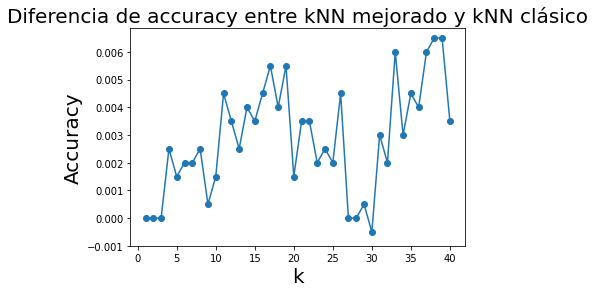

In [11]:
plt.rc('font', size=10)
plt.rc('axes', titlesize=10)
plt.rc('axes', labelsize=10)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('legend', fontsize=10)
plt.rc('figure', titlesize=10)

plt.plot(range(1, 41), better_accuracies_np - accuracies_np, '-o')
plt.xlabel('k', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.ylim(bottom=-0.0010)
plt.title('Diferencia de accuracy entre kNN mejorado y kNN clásico', fontsize=20)
plt.show()